# 주성분 분석(PCA) 소개
- 주성분 분석은 데이터에 있는 분산이 큰 방향을 찾는 것
 - 분산 : 데이터가 널리 퍼져있는 정도
 - 분산이 큰 방향 : 데이터를 잘 표현하는 어떤 벡터
- 주성분 벡터의 원소 개수는 원본 데이터셋에 있는 특성 개수와 같음.
  - 즉 주성분은 원본 차원과 같고,
 - 주성분으로 바꾼 데이터는 차원이 줄어듦
 - 일반적으로 주성분은 원본 특성의 개수만큼 찾을 수 있음
- 주성분을 찾는 방법
 1. 첫 번째 주성부을 찾음
 2. 첫 번째 주성분 벡터에 수직이고 분산이 가장 큰 다음 방향을 찾음
 => 이 벡터가 두 번째 주성분

## PCA 클래스

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2023-02-04 06:31:02--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-02-04 06:31:03--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-02-04 06:31:03--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50) #매개변수 n_components에 주성분의 개수 지정
pca.fit(fruits_2d) #비지도 학습이므로 타깃값을 제공하지 않음

PCA(n_components=50)

PCA 클래스가 찾은 주성분은 components_ 속성에 저장되어 있음
- 첫 번째 차원은 주성분의 개수
- 두 번째 차원은 항상 원보 데이터의 특성 개수와 같음

In [5]:
pca.components_.shape

(50, 10000)

In [6]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio = 1): #(샘플 개수, 너비, 높이)의 3차원 배열을 입력받음
  n = len(arr) #n 은 샘플 개수
  rows = int(np.ceil(n/10)) # 한 줄에 10개씩 이미지를 그림. 샘플 개수를 10으로 나눠 전체 행 개수를 계산
  cols = n if rows<2 else 10 # 행이 1개이면 열의 개수는 샘플의 개수, 그렇지 않으면 열의 개수는 10개

  fig,axs = plt.subplots(rows, cols, figsize = (cols*ratio, rows*ratio), #fig size는 ratio 매개변수에 비례하여 커짐. ratio 기본값은 1
                         squeeze = False)
  
  for i in range(rows):
    for j in range(cols): 
      if i*10 + j < n: #n개까지만 그림
        axs[i,j].imshow(arr[i*10+j], cmap = 'gray_r')
      axs[i,j].axis('off')
  plt.show()
     

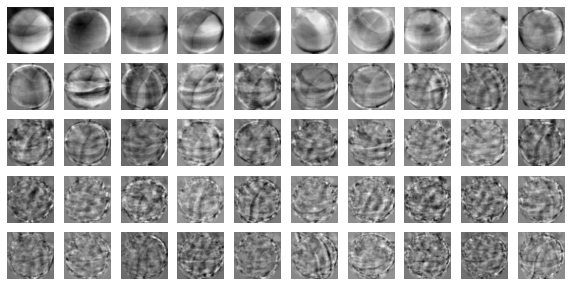

In [7]:
draw_fruits(pca.components_.reshape(-1,100,100))

-> 주성분은 원본 데이터에서 가장 분산이 큰 방향을 순서대로 나타낸 것

주성분을 찾았으므로 원본 데이터를 주성분에 투영하여 특성의 개수를 10,000개에서 50개로 줄일 수 있음
<br> transform() 메서드 이용

In [8]:
fruits_2d.shape

(300, 10000)

In [9]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

<br>

## 원본 데이터 재구성 

inverse_transform() 메서드 : 차원 축소한 데이터를 원본 데이터의 특성 수 만큼 복원

In [10]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

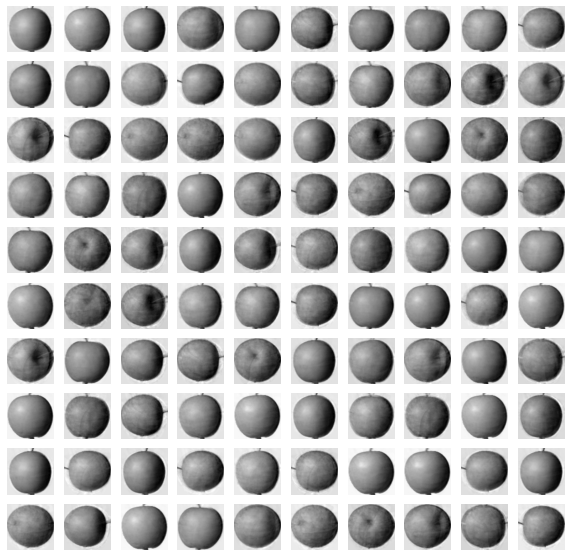

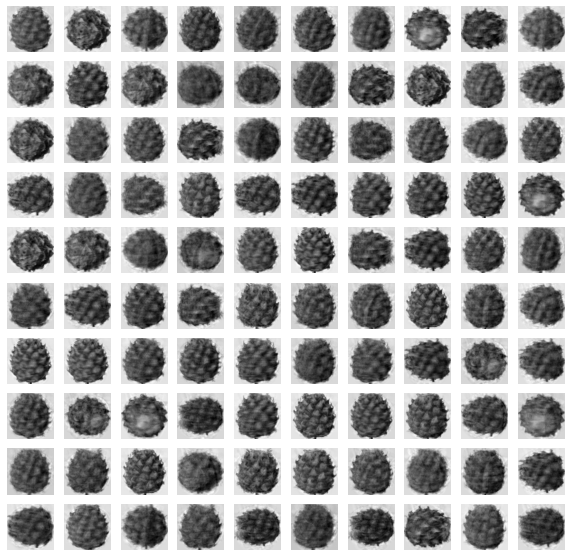

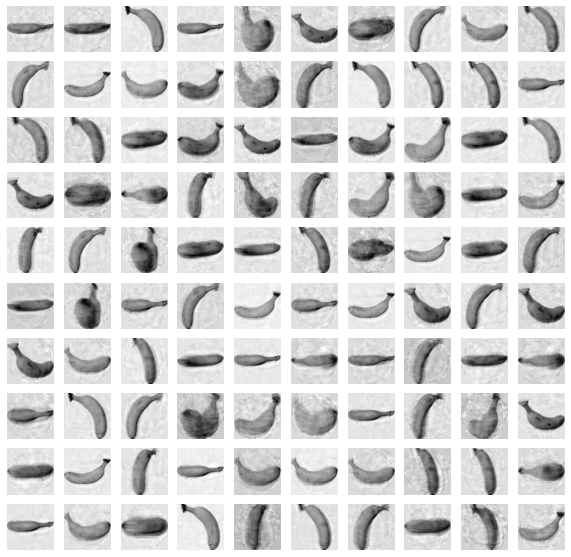

In [12]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')

<br>

## 설명된 분산(explained variance)
- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
- PCA 클래스의 explained_variance_ratio 에 각 주성분의 설명된 분산 비율이 기록되어 있음
- 첫 버쨰 주성분의 설명된 분산이 가장 큼
- 분산 비율을 모두 더하면 주성분들이 포함하고 있는 총 분산 비율 도출 가능

In [14]:
print(np,sum(pca.explained_variance_ratio_))

<module 'numpy' from '/usr/local/lib/python3.8/dist-packages/numpy/__init__.py'> 0.9214587559048194


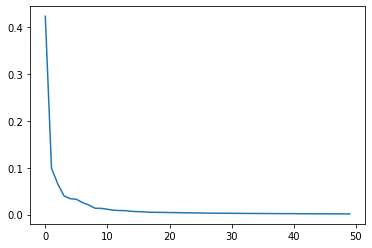

In [15]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

<br>

## 다른 알고리즘과 함께 사용하기


과일 사진 원본 데이터와 PCA로 축소한 데이터를 지도 학습에 적용해 보고 어떤 차이가 있는지 알아보자


### 1. 로지스틱 회귀 모형 + PCA

In [16]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [17]:
target = np.array([0]*100 + [1]*100 + [2]*100) # 사과 = 0, 파인애플 = 1, 바나나 =  

In [18]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
2.0788879871368406


=> 원본 데이터를 사용했을 때 교차 검증의 점수는 0.99
<br> => cross_validate() 함수가 반환하는 딕셔너리에는 fit_time 항목에 각 교차 검증 폴드의 훈련 시간이 기록되어 있음

In [20]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.04814977645874023


=> 차원 축소된 데이터를 사용했을 때 교차 검증의 점수는 1.0
<br> => 각 교차 검증 폴드의 훈련 시간도 짧음

PCA 클래스의 n_compomentes 매개변수에 주성분의 개수 대신, 원하는 설명된 분산의 비율을 입력할 수도 있음
<br> PCA 클래스는 지정된 비율에 도달할 때까지 자동으로 주성분을 찾음

In [22]:
pca = PCA(n_components = 0.5)
pca.fit(fruits_2d)
pca.n_components_

2

=> 2개의 특성만으로 원본 데이터에 있는 분산의 50%를 표현할 수 있음

위 모델로 원본 데이터를 변환하면 다음과 같음. 주성분이 2개이므로 변환된 데이터의 크기는 (300,2)

In [23]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 2)

In [24]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.037970542907714844


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

### k-평균 알고리즘 + PCA
클러스터 찾기

In [26]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters = 3, random_state =42)
km.fit(fruits_pca)
np.unique(km.labels_, return_counts = True)

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))

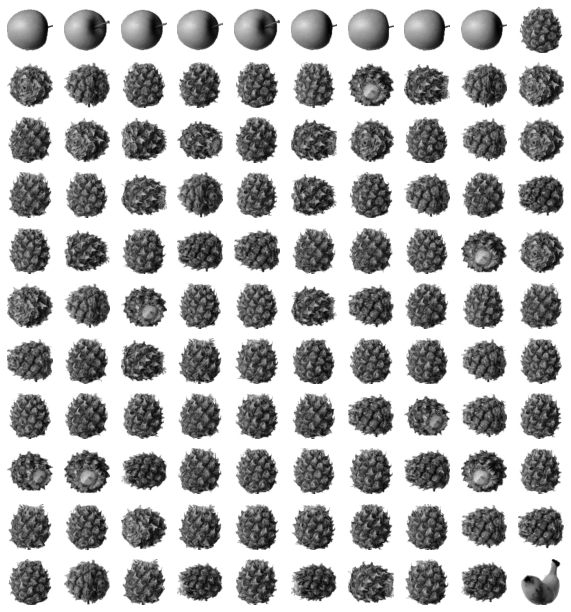

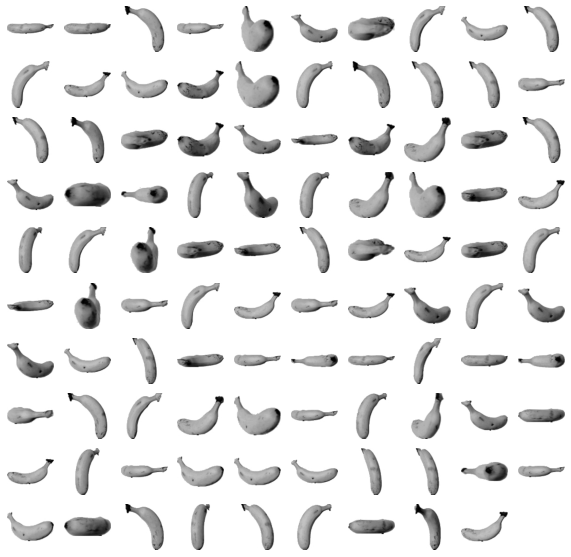

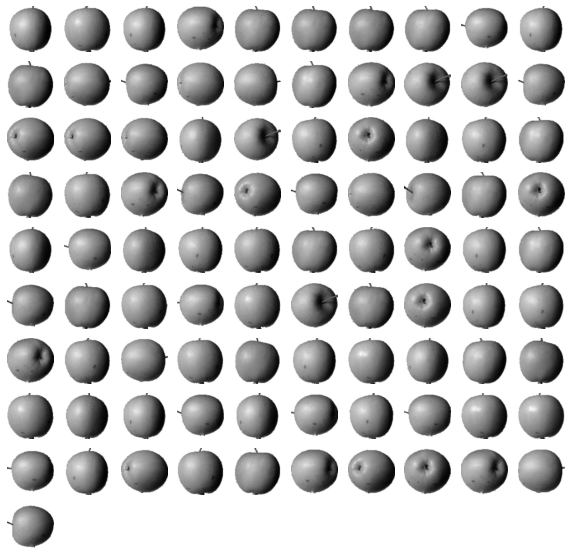

In [27]:
for label in range(0,3):
  draw_fruits(fruits[km.labels_ == label])
  print('\n')

훈련 데이터의 차원을 3개 이하로 줄이면 시각화가 용이해짐

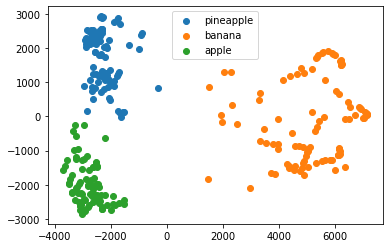

In [32]:
for label in range(0,3):
  data = fruits_pca[km.labels_ == label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['pineapple', 'banana', 'apple'])
plt.show()